# ALICE Masterclass $R_{AA}$

    Load necessary packages

In [23]:
import ALICE_RAA_Tools as at
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

List of available centrality classes:

    0-5%, 0-10%, 5-10%, 10-20%, 20-30%, 30-40%, 40-50%, 50-60%, 60-70%, 70-80%, 80-90%

__ATTENTION:__
Here you can modify, add, or delete centrality classes. But be careful. The centrality class 70-80% serves as reference for $R_{cp}$. Therfore, it shouldn't be deleted.
    

In [24]:
listCentralities = [(0,10),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,90)]

    Create a Dictionary

In [25]:
dictCentralities = at.create_dictionary(listCentralities)


processing centrality range: 0-10% - (0/10)
processing centrality range: 10-20% - (10/20)
processing centrality range: 20-30% - (20/30)
processing centrality range: 30-40% - (30/40)
processing centrality range: 40-50% - (40/50)
processing centrality range: 50-60% - (50/60)
processing centrality range: 60-70% - (60/70)
processing centrality range: 70-80% - (70/80)
processing centrality range: 80-90% - (80/90)


# 1. Event Analysis

### 1.1 Read the events

    Count the events

In [26]:
event_lines = at.count_lines('event_information.csv')
print("Number of events: '" + str(event_lines) + "'!")

Number of events: '118909'!


    Read event information from CSV file

In [27]:
df_events = pd.read_csv("event_information.csv", header=None, names=['eventMult', 'eventCent'])

In [28]:
print(df_events.head(10))

   eventMult  eventCent
0          4   100.0000
1          1    88.2660
2        275    41.6756
3        449    23.1375
4        267    42.8638
5         90    62.2541
6          5   100.0000
7        280    41.4848
8         84    61.8446
9        454    23.7093


### 1.2 Process the data

    Add columns to DataFrame for each centrality class

In [29]:
for key in dictCentralities:
    df_events[key] = False

print(df_events.head(10))

   eventMult  eventCent   0-10  10-20  20-30  30-40  40-50  50-60  60-70  \
0          4   100.0000  False  False  False  False  False  False  False   
1          1    88.2660  False  False  False  False  False  False  False   
2        275    41.6756  False  False  False  False  False  False  False   
3        449    23.1375  False  False  False  False  False  False  False   
4        267    42.8638  False  False  False  False  False  False  False   
5         90    62.2541  False  False  False  False  False  False  False   
6          5   100.0000  False  False  False  False  False  False  False   
7        280    41.4848  False  False  False  False  False  False  False   
8         84    61.8446  False  False  False  False  False  False  False   
9        454    23.7093  False  False  False  False  False  False  False   

   70-80  80-90  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  
5  False  False  
6  False  False  
7  False  False  
8

    Set the centrality information und count the events for each centrality class

In [30]:
dictEventsCent = {}
for row in df_events.iterrows():
    keys = at.find_centralities(dictCentralities, row[1]['eventCent'])
    if keys:
        for cent in keys:
            df_events.loc[row[0], cent] = True
            if cent in dictEventsCent:
                dictEventsCent[cent] += 1 #increment the dictionary
            else:
                dictEventsCent[cent] = 1 #initialize the dictionary

In [31]:
print(df_events.head(10))
print(dictEventsCent)

   eventMult  eventCent   0-10  10-20  20-30  30-40  40-50  50-60  60-70  \
0          4   100.0000  False  False  False  False  False  False  False   
1          1    88.2660  False  False  False  False  False  False  False   
2        275    41.6756  False  False  False  False   True  False  False   
3        449    23.1375  False  False   True  False  False  False  False   
4        267    42.8638  False  False  False  False   True  False  False   
5         90    62.2541  False  False  False  False  False  False   True   
6          5   100.0000  False  False  False  False  False  False  False   
7        280    41.4848  False  False  False  False   True  False  False   
8         84    61.8446  False  False  False  False  False  False   True   
9        454    23.7093  False  False   True  False  False  False  False   

   70-80  80-90  
0  False  False  
1  False   True  
2  False  False  
3  False  False  
4  False  False  
5  False  False  
6  False  False  
7  False  False  
8

### 1.3 Output of the results

    Create and plot particle-multiplicity histograms

In [32]:
hTPC_0_100, bins = at.create_event_histos(df_events['eventMult']) #integrated over all centralities
hTPC_0_10, bins = at.create_event_histos(df_events[df_events['0-10'] == True]['eventMult'])
hTPC_10_20, bins = at.create_event_histos(df_events[df_events['10-20'] == True]['eventMult'])
hTPC_20_30, bins = at.create_event_histos(df_events[df_events['20-30'] == True]['eventMult'])
hTPC_30_40, bins = at.create_event_histos(df_events[df_events['30-40'] == True]['eventMult'])
hTPC_40_50, bins = at.create_event_histos(df_events[df_events['40-50'] == True]['eventMult'])
hTPC_50_60, bins = at.create_event_histos(df_events[df_events['50-60'] == True]['eventMult'])
hTPC_60_70, bins = at.create_event_histos(df_events[df_events['60-70'] == True]['eventMult'])
hTPC_70_80, bins = at.create_event_histos(df_events[df_events['70-80'] == True]['eventMult'])
hTPC_80_90, bins = at.create_event_histos(df_events[df_events['80-90'] == True]['eventMult'])

In [33]:
# Uncertainity calculation
# Uncertainty is the square root of the number of events in each bin
hTPC_0_100_err = np.sqrt(hTPC_0_100)
hTPC_0_10_err = np.sqrt(hTPC_0_10)
hTPC_10_20_err = np.sqrt(hTPC_10_20)
hTPC_20_30_err = np.sqrt(hTPC_20_30)
hTPC_30_40_err = np.sqrt(hTPC_30_40)
hTPC_40_50_err = np.sqrt(hTPC_40_50)
hTPC_50_60_err = np.sqrt(hTPC_50_60)
hTPC_60_70_err = np.sqrt(hTPC_60_70)
hTPC_70_80_err = np.sqrt(hTPC_70_80)
hTPC_80_90_err = np.sqrt(hTPC_80_90)

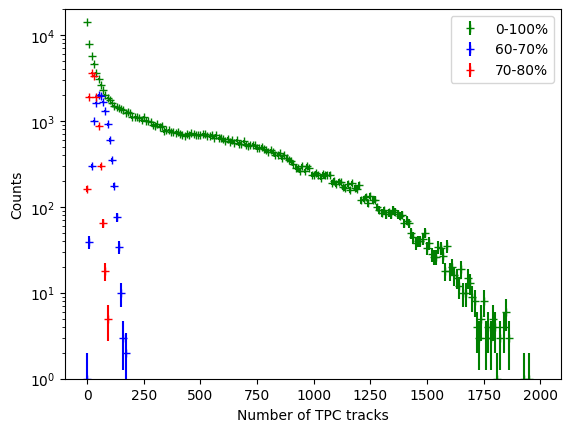

In [34]:
plt.errorbar(bins[:-1], hTPC_0_100, yerr=hTPC_0_100_err, fmt='g+', label='0-100%')
plt.errorbar(bins[:-1], hTPC_60_70, yerr=hTPC_60_70_err, fmt='b+', label='60-70%')
plt.errorbar(bins[:-1], hTPC_70_80, yerr=hTPC_70_80_err, fmt='r+', label='70-80%')
#for the 'fmt' option you find useful information here:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

plt.xlabel('Number of TPC tracks')
plt.ylabel('Counts')
plt.ylim(1,2E4)
plt.yscale('log')

plt.legend(loc='upper right')
plt.savefig('TPC_tracks.pdf')

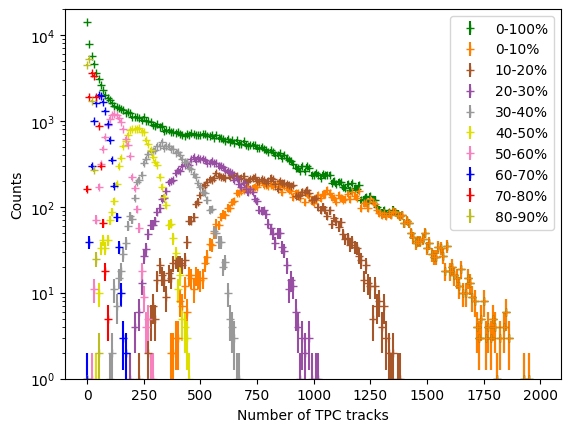

In [35]:
#slected colors are colorblind friendly and can be found here:
#https://gist.github.com/thriveth/8560036
plt.errorbar(bins[:-1], hTPC_0_100, yerr=hTPC_0_100_err, fmt='g+', label='0-100%')
plt.errorbar(bins[:-1], hTPC_0_10, yerr=hTPC_0_10_err, fmt='#ff7f00', label='0-10%',marker='+', linestyle='None')
plt.errorbar(bins[:-1], hTPC_10_20, yerr=hTPC_10_20_err, fmt='#a65628', label='10-20%',marker='+', linestyle='None')
plt.errorbar(bins[:-1], hTPC_20_30, yerr=hTPC_20_30_err, fmt='#984ea3', label='20-30%',marker='+', linestyle='None')
plt.errorbar(bins[:-1], hTPC_30_40, yerr=hTPC_30_40_err, fmt='#999999', label='30-40%',marker='+', linestyle='None')
plt.errorbar(bins[:-1], hTPC_40_50, yerr=hTPC_40_50_err, fmt='#dede00', label='40-50%',marker='+', linestyle='None')
plt.errorbar(bins[:-1], hTPC_50_60, yerr=hTPC_50_60_err, fmt='#f781bf', label='50-60%',marker='+', linestyle='None')
plt.errorbar(bins[:-1], hTPC_60_70, yerr=hTPC_60_70_err, fmt='b+', label='60-70%')
plt.errorbar(bins[:-1], hTPC_70_80, yerr=hTPC_70_80_err, fmt='r+', label='70-80%')
plt.errorbar(bins[:-1], hTPC_80_90, yerr=hTPC_80_90_err, fmt='#BCBD22', label='80-90%',marker='+', linestyle='None')
#for the 'fmt' option you find useful information here:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

plt.xlabel('Number of TPC tracks')
plt.ylabel('Counts')
plt.ylim(1,2E4)
plt.yscale('log')

plt.legend(loc='upper right')
plt.savefig('TPC_tracks.pdf')

    2D plot: charged-particle track multiplicity vs. centrality

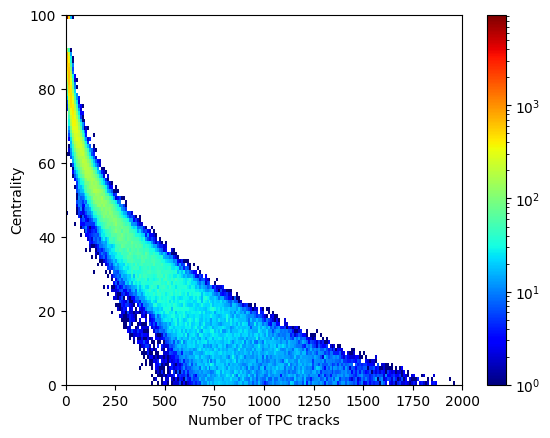

In [36]:
plt.hist2d(df_events['eventMult'],df_events['eventCent'], bins=(200,100), range=[[0, 2000], [0, 100]], cmap=plt.cm.jet, norm=mpl.colors.LogNorm())

plt.colorbar()
plt.xlabel('Number of TPC tracks')
plt.ylabel('Centrality')
plt.savefig('TPC_tracks_2D.pdf')

# 2. Charged-particle tracks und momentum spectra

    List of available centrality classes:
 
     0-5%, 0-10%, 5-10%, 10-20%, 20-30%, 30-40%, 40-50%, 50-60%, 60-70%, 70-80%, 80-90%

## 2.1 Read the Pb-Pb data

In [37]:
print("Number of tracks: '38042122'! ~600 MB file (unpacked)")

Number of tracks: '38042122'! ~600 MB file (unpacked)


In [38]:
dictMomCent = {}
for key in dictCentralities:
    dictMomCent[key] = []

In [39]:
#df_tracks = pd.read_pickle("./track_info.pkl", 'bz2').to_numpy()
data_tracks = pd.read_pickle("./track_info.pkl", 'bz2')

In [40]:
# print column names in df_tracks
print("Column names:", data_tracks.columns.tolist())

Column names: ['trackPt', 'trackCent']


In [41]:
print(data_tracks.head(10))

    trackPt  trackCent
0  0.302062   100.0000
1  0.302308   100.0000
2  0.399647   100.0000
3  0.521699   100.0000
4  0.324580    88.2660
5  0.946267    41.6756
6  1.077990    41.6756
7  1.057860    41.6756
8  1.367700    41.6756
9  1.087940    41.6756


In [42]:
df_tracks = data_tracks.to_numpy()

### 2.2 Sort according to centrality class

In [43]:
for line in df_tracks:
    keys = at.find_centralities(dictCentralities, line[1])
    if keys:
        for key in keys:
            dictMomCent[key].append(line[0]) #append the momentum to the dictionary of the corresponding centrality

### 2.3 Creation of histograms

In [44]:
binsPt = at.get_bins() #returns the predefined bin edges for the momentum
binWidth = at.get_bin_width(binsPt) #bins[i+1]-bins[i]
x_bin_width = np.asarray(binWidth)/2

In [66]:
hPbPb_60_70, _ = np.histogram(dictMomCent['60-70'], binsPt)
hPbPb_60_70_err = np.sqrt(hPbPb_60_70) / dictEventsCent['60-70']
hPbPb_60_70 = hPbPb_60_70 / binWidth
hPbPb_60_70 = hPbPb_60_70 / dictEventsCent['60-70']

hPbPb_70_80, _ = np.histogram(dictMomCent['70-80'], binsPt)
# Spezial case for 70-80%: one bin has zero counts - problematic for division later on - therefore: replace 0 with 1
hPbPb_70_80 = np.where(hPbPb_70_80==0,1,hPbPb_70_80)
hPbPb_70_80_err = np.sqrt(hPbPb_70_80) / dictEventsCent['70-80']
hPbPb_70_80 = hPbPb_70_80 / binWidth
hPbPb_70_80 = hPbPb_70_80 / dictEventsCent['70-80']

In [67]:
#TASK
hPbPb_30_40, _ = np.histogram(dictMomCent['30-40'], binsPt)
hPbPb_30_40_err = np.sqrt(hPbPb_30_40) / dictEventsCent['30-40']
hPbPb_30_40 = hPbPb_30_40 / binWidth
hPbPb_30_40 = hPbPb_30_40 / dictEventsCent['30-40']

### 2.4 Read the proton-proton reference

In [89]:
pp = np.genfromtxt('pp_reference.dat')
#print(pp)
pp_err = np.divide(pp,10) #Assumption: 10% uncertainty on pp data

### 2.5 Plot transverse-momentum spectra of charged particles

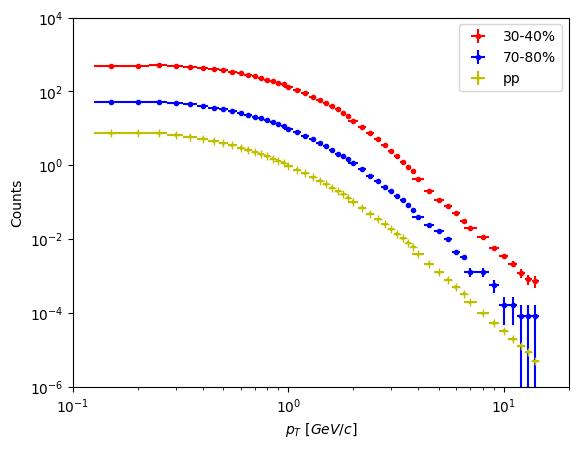

In [97]:
plt.errorbar(binsPt[:-1], hPbPb_30_40, xerr=x_bin_width, yerr=hPbPb_30_40_err, fmt='r.', label='30-40%')
#plt.errorbar(binsPt[:-1], hPbPb_60_70, xerr=x_bin_width, yerr=hPbPb_60_70_err, fmt='g.', label='60-70%')
plt.errorbar(binsPt[:-1], hPbPb_70_80, xerr=x_bin_width, yerr=hPbPb_70_80_err, fmt='b.', label='70-80%')
plt.errorbar(binsPt[:-1], pp,          xerr=x_bin_width, yerr=pp_err,          fmt='y+', label='pp')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 20)
plt.ylim(1E-6, 1E4)

plt.xlabel(r'$p_{T}\ [\mathit{GeV/c}]$')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.show()

### 2.6 Define centrality classes

Define number of binary collisions for each centrality class

In [48]:
dictNColl = {'0-5': 1686.87,
             '0-10': 1502.7,
             '5-10': 1319.89,
             '10-20': 923.89,
             '20-30': 558.68,
             '30-40': 321.20,
             '40-50': 171.67,
             '50-60': 85.13,
             '60-70': 38.51,
             '70-80': 15.78,
             '80-90': 6.32,
             'pp':1.
            }

print(dictNColl)

{'0-5': 1686.87, '0-10': 1502.7, '5-10': 1319.89, '10-20': 923.89, '20-30': 558.68, '30-40': 321.2, '40-50': 171.67, '50-60': 85.13, '60-70': 38.51, '70-80': 15.78, '80-90': 6.32, 'pp': 1.0}


### 2.7 Calculate and plot $R_\text{AA}$

$$
R_{AA} = \frac{\frac{1}{N_{evt}^{AA}}\cdot \frac{dN^{AA}}{dp_t}}{<N_{coll}>\cdot \frac{1}{N_{evt}^{pp}}\cdot \frac{dN^{pp}}{dp_t}}
$$


In [74]:
RAA_30_40 = np.divide(hPbPb_30_40 / dictNColl['30-40'], pp)
RAA_60_70 = np.divide(hPbPb_60_70 / dictNColl['60-70'], pp)
RAA_70_80 = np.divide(hPbPb_70_80 / dictNColl['70-80'], pp)

In [75]:
RAA_30_40_err = at.fehlerberechnung(hPbPb_30_40, hPbPb_30_40_err, dictNColl['30-40'], pp, pp_err, dictNColl['pp'])
RAA_60_70_err = at.fehlerberechnung(hPbPb_60_70, hPbPb_60_70_err, dictNColl['60-70'], pp, pp_err, dictNColl['pp'])
RAA_70_80_err = at.fehlerberechnung(hPbPb_70_80, hPbPb_70_80_err, dictNColl['70-80'], pp, pp_err, dictNColl['pp'])

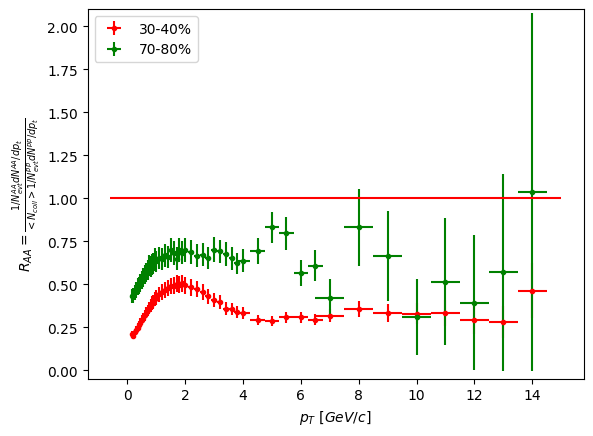

In [114]:
plt.errorbar(binsPt[:-1], RAA_30_40, xerr=x_bin_width, yerr=RAA_30_40_err, fmt='r.', label='30-40%')
#plt.errorbar(binsPt[:-1], RAA_60_70, xerr=x_bin_width, yerr=RAA_60_70_err, fmt='b.', label='60-70%')
plt.errorbar(binsPt[:-1], RAA_70_80, xerr=x_bin_width, yerr=RAA_70_80_err, fmt='g.', label='70-80%')

plt.hlines(1, plt.gca().get_xlim()[0], 15, color="red")
#plt.xlim(0, 20)
plt.ylim(-0.05,2.1)
plt.xlabel(r'$p_{T}\ [\mathit{GeV/c}]$')
plt.ylabel(r'$R_{AA}=\frac{1/N^{AA}_{evt}dN^{AA}/dp_t}{<N_{coll}>1/N_{evt}^{pp}dN^{pp}/dp_t}}$')
plt.legend(loc='upper left')
plt.savefig('RAA_compared.pdf')

Show individual values for $R_{AA}$ at certain transverse pulses for the overall evaluation

In [77]:
at.get_value_and_error(RAA_30_40, RAA_30_40_err, 5.5)
at.get_value_and_error(RAA_30_40, RAA_30_40_err, 10)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [52]:
at.get_value_and_error(RAA_60_70, RAA_60_70_err, 5.5)
at.get_value_and_error(RAA_60_70, RAA_60_70_err, 10)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 2.8 Extra task: Calculate and plot $R_{\text{CP}}$

$$
R_{cp}=\frac{\frac{1}{N^{AA,X}_{evt}}\cdot\frac{1}{<N_{coll,X}>}\cdot\frac{dN^{AA,X}}{dp_t}}{\frac{1}{N^{PbPb,per}_{evt}}\cdot\frac{1}{<N_{coll,per}>}\cdot\frac{dN^{PbPb,per}}{dp_t}}
$$

In [78]:
RCP_30_40 = np.divide(hPbPb_30_40 / dictNColl['30-40'], hPbPb_70_80 / dictNColl['70-80'])
RCP_60_70 = np.divide(hPbPb_60_70 / dictNColl['60-70'], hPbPb_70_80 / dictNColl['70-80'])

In [79]:
RCP_30_40_err = at.fehlerberechnung(hPbPb_30_40, hPbPb_30_40_err, dictNColl['30-40'], hPbPb_70_80, hPbPb_70_80_err, dictNColl['70-80'])
RCP_60_70_err = at.fehlerberechnung(hPbPb_60_70, hPbPb_60_70_err, dictNColl['60-70'], hPbPb_70_80, hPbPb_70_80_err, dictNColl['70-80'])

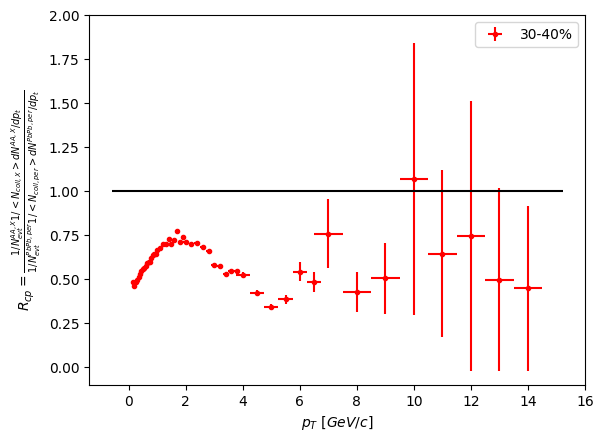

In [87]:
plt.errorbar(binsPt[:-1], RCP_30_40, xerr=x_bin_width, yerr=RCP_30_40_err, fmt='r.', label='30-40%')
#plt.errorbar(binsPt[:-1], RCP_60_70, xerr=x_bin_width, yerr=RCP_60_70_err, fmt='b.', label='60-70%')

plt.hlines(1, plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], color="black")
plt.ylim(-0.1,2)
plt.xlabel(r'$p_{T}\ [\mathit{GeV/c}]$')
plt.ylabel(r'$R_{cp}=\frac{1/N^{AA,X}_{evt}1/<N_{coll,X}>dN^{AA,X}/dp_t}{1/N^{PbPb,per}_{evt}1/<N_{coll,per}>dN^{PbPb,per}/dp_t}$')
plt.legend(loc='upper right')
plt.savefig('RCP_compared.pdf')